In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1. Data collection 

In [2]:
col_name = ['stat_date','user_id','serial_number','guanting_date','guanting_bcyc_id','join_months','sex_code','age'
,'single_phone_flag','term_merge_flag','star_level','ronghe_flag','chnl_id','eparchy_code',
'id_user_cnt','imei_user_cnt','rizuka_flag','maker','version','waisheng_id_iccid','tousu_flag'
,'xieru_flag','sms_num','sms_act_days','lac_cell_cnt','day_lac_cnt_lm1','night_lac_cnt_lm1','day_lac_cnt_lm2'
,'night_lac_cnt_lm2','act_voice_days_lm1','act_voice_days_lm2','act_voice_days_lm3','act_voice_days',
'day_call_num_lm1','day_call_num_lm2','day_call_num_lm3','day_call_num','night_call_num_lm1'
,'night_call_num_lm2','night_call_num_lm3','night_call_num','call_dura_lm1','call_dura_lm2','call_dura_lm3'
,'call_dura','call_num_lm1','call_num_lm2','call_num_lm3','call_num','other_cnt_lm1','other_cnt_lm2'
,'other_cnt_lm3','other_cnt','calling_num_lm1','calling_num_lm2','calling_num_lm3','calling_num'
,'calling_other_cnt_lm1','calling_other_cnt_lm2','calling_other_cnt_lm3','calling_other_cnt'
,'call_gongzhong_flag_lm1','call_gongzhong_flag_lm2','call_gongzhong_flag_lm3','call_gongzhong_flag'
,'call_60s_interval_times','call_300s_interval_times','call_60s_interval_ratio','call_300s_interval_ratio'
,'call_45s_times_lm1','call_300s_times_lm1','call_500s_times_lm1','call_45s_times_lm2','call_300s_times_lm2'
,'call_500s_times_lm2','call_45s_times','call_300s_times','call_500s_times','call_45s_times_ratio_lm1'
,'call_300s_times_ratio_lm1','call_500s_times_ratio_lm1','call_45s_times_ratio_lm2','call_300s_times_ratio_lm2'
,'call_500s_times_ratio_lm2','call_45s_times_ratio','call_300s_times_ratio','call_500s_times_ratio'
,'call_1day_huibo_times','call_huibo_times','call_1day_huibo_ratio','call_huibo_ratio','zhujiao_call_interval'
,'beijiao_call_interval','period','other_number_age_avg','other_number_agevar_pop','sex_11_ratio','sex_12_ratio'
,'other_waisheng_ratio','waisheng_cnt','open_act_flag','main_prd_flow','main_feeset_dura','main_prod_fee_lm1'
,'main_prod_fee_lm2','main_prod_fee_lm3','total_fee_lm1','total_fee_lm2','total_fee_lm3','main_ratio_lm1','main_ratio_lm2'
,'dura_ratio_lm1','dura_ratio_lm2','open_date','chnl_kind_code']

In [3]:
len(col_name)

115

In [4]:
data_plus = pd.read_csv('zyb1.csv',sep = ',',names = col_name,index_col=False, header = None,encoding = 'utf-8')

data_minus = pd.read_csv('fyb1.csv',sep = ',',names = col_name ,index_col=False, header = None,encoding = 'utf-8')

data_plus['label']=1
data_minus['label']=0

In [5]:
data_all = pd.concat([data_plus,data_minus],axis =0)
data_all = data_all.reset_index(drop = True)
data_all.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,sms_num,sms_act_days,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label
0,2020-03-03,20310031247431,10000,2020-03-03,202003,25.0,11.0,47.0,0.0,0.0,二星,0,120001304.0,120000000.0,2.0,NaN,1,Z,Z,0,0,0,NaN,NaN,NaN,1.0,0.0,19.0,9.0,20.0,1.0,10.0,4,1.0,33.0,NaN,10.0,0.0,12.0,NaN,0.0,7.0,2250.0,NaN,294.0,1.0,45.0,NaN,10.0,1.0,18.0,NaN,4.0,1.0,28.0,NaN,5.0,1.0,16.0,NaN,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.3333,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,period4,43.0,20.25,100.0,0.0,0.0000,0.0,1,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,2018-03-19,1,1
1,2020-03-31,12310015331327,10000,2020-03-31,202003,5.0,11.0,22.0,0.0,0.0,Z,0,112054371.0,112000000.0,3.0,3.0,0,华为,EML-TL00,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2019-11-02,1,1
2,2020-03-09,11310042606883,10000,2020-03-09,202003,2.0,11.0,23.0,1.0,0.0,Z,0,111057001.0,111000000.0,5.0,1.0,0,欧珀,PBAM00,0,0,0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,1.0,1.0,NaN,2,1.0,NaN,NaN,7.0,0.0,NaN,NaN,0.0,2.0,NaN,NaN,1544.0,1.0,NaN,NaN,7.0,1.0,NaN,NaN,6.0,1.0,NaN,NaN,7.0,1.0,NaN,NaN,6.0,0.0,NaN,NaN,0.0,3.0,5.0,60.0,100.0,1.0,0.0,0.0,NaN,NaN,NaN,3.0,2.0,1.0,100.0000,0.0,0.0,NaN,NaN,NaN,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,NaN,period3,NaN,NaN,NaN,NaN,83.3333,4.0,1,6236.0,100.0,18.0,NaN,NaN,0.4,NaN,NaN,0.0,NaN,1.00,0.00,2020-02-25,1,1
3,2020-03-03,18310019160231,10000,2020-03-03,202003,3.0,11.0,23.0,0.0,0.0,Z,0,118058857.0,118000000.0,3.0,3.0,0,苹果,iPhone 7 A1660,0,0,0,2.0,2.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,period3,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,30

## 2. Exploratory Data Analysis 

### 2.1 Overview 

In [6]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101363 entries, 0 to 101362
Columns: 116 entries, stat_date to label
dtypes: float64(96), int64(11), object(9)
memory usage: 89.7+ MB


In [7]:
data_all.describe(include=['object'])

,stat_date,guanting_date,star_level,chnl_id,maker,version,period,open_date,chnl_kind_code
count,101363,101363,101362,101362.0,100615,100615,95320,101363,95227
unique,83,83,10,12926.0,408,3068,4,7937,4
top,2020-06-30,2020-06-30,一星,10017.0,华为,Z,period2,1999-01-01,1
freq,100000,100000,29373,5263.0,32592,5914,31840,921,52628


This dataset contains 101363 samples and 116 columns.

### 2.2 Tagret variable

In [8]:
data_all['label'].value_counts()

0    100000
1      1363
Name: label, dtype: int64

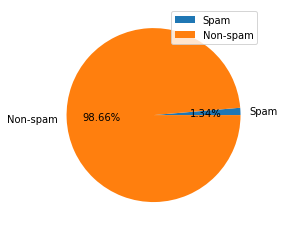

In [9]:
import matplotlib.pyplot as plt
churn_pie  = [1363, 100000]
plt.pie(churn_pie, labels= ['Spam', 'Non-spam'], autopct="%1.2f%%")
plt.legend()

The spam rate is 1.34%, which means we have an extremely unbalanced dataset.

### 2.2 Numeric columns and target variable  

In [10]:
data_all.corr()['label'].sort_values(ascending = False)

label                        1.000000
other_waisheng_ratio         0.238678
call_300s_interval_ratio     0.186584
waisheng_cnt                 0.153003
id_user_cnt                  0.115111
call_60s_interval_ratio      0.106447
single_phone_flag            0.098801
waisheng_id_iccid            0.065718
tousu_flag                   0.046304
call_300s_times_ratio        0.031955
rizuka_flag                  0.021938
sex_12_ratio                 0.015613
call_300s_times_ratio_lm1    0.015510
night_call_num_lm3           0.014528
call_300s_times_ratio_lm2    0.009887
call_500s_times_ratio_lm1    0.009604
call_500s_times_ratio        0.009008
main_ratio_lm2               0.006522
call_500s_times_ratio_lm2    0.003527
call_gongzhong_flag_lm1      0.003180
call_gongzhong_flag_lm2      0.002178
call_gongzhong_flag_lm3      0.000406
night_lac_cnt_lm2           -0.000170
call_gongzhong_flag         -0.000687
sms_num                     -0.002579
main_prod_fee_lm3           -0.002579
xieru_flag  

Compared to other columns, other_waisheng_ratio, waisheng_cnt, call_300s_interval_ratio,id_user_cnt,age,join_months, act_voice_days_lm3, call_huibo_ratio, act_voice_days_lm1, act_voice_days, guanting_bcyc_id have high correlation with the target variable. 

### 2.3 Catogorcial columns and target variable 

In [3]:
# Here we will focus on star_level, period and chnl_kind_code
print(data_all.groupby('star_level')['label'].mean())
print('-' * 30)
print(data_all.groupby('period')['label'].mean())
print('-' * 30)
print(data_all.groupby('chnl_kind_code')['label'].mean())

NameError: name 'data_all' is not defined

In [2]:
data_all['star_level'] = data_all['star_level'].apply(lambda x: 1 if x is 'Z' else 0)

NameError: name 'data_all' is not defined

1.star_level: the spam rate is significantly different among 'Z', '五星钻', and others

2.period: the spam rate is different among four different values

3.chnl_kind_code is significantly different between '1' and other values

## 3. Data proprecessing 

### 3.1 Missing values 

In [12]:
# Perecentage of missing values for each column.
percent_missing = 100*data_all.isnull().sum()/len(data_all)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value.sort_values('percent_missing', inplace=True)
missing_value

,percent_missing
stat_date,0.000000
open_date,0.000000
dura_ratio_lm2,0.000000
dura_ratio_lm1,0.000000
open_act_flag,0.000000
act_voice_days,0.000000
xieru_flag,0.000000
tousu_flag,0.000000
waisheng_id_iccid,0.000000
rizuka_flag,0.000000


1.Drop the columns: sms_num and sms_act_days where the ratios of missing values are too high(63%).

2.Repacing missing values with means: columns with 10% -30% of missing values (With normal Distribution)

3.Filling in missing values with next value, i.e. backward fill: columns with less 10% of missing values

4.Filling in missing values with modes: columns with 10% -30% of missing values (Without normal distribution)

In [ ]:
data[]

In [13]:
data_all.drop(columns=['sms_num', 'sms_act_days'], inplace=True)

In [14]:
# Columns with 10% -30% of missing values
missing_10_30 = data_all[['beijiao_call_interval', 'sex_11_ratio', 'sex_12_ratio', 'other_number_age_avg', 'other_number_agevar_pop', 'call_60s_interval_ratio', 'call_300s_interval_times', 'call_60s_interval_times', 'zhujiao_call_interval', 'call_300s_interval_ratio', 'lac_cell_cnt']]
missing_10_30.head()

,beijiao_call_interval,sex_11_ratio,sex_12_ratio,other_number_age_avg,other_number_agevar_pop,call_60s_interval_ratio,call_300s_interval_times,call_60s_interval_times,zhujiao_call_interval,call_300s_interval_ratio,lac_cell_cnt
0,20883.0,100.0,0.0,43.0,20.25,0.0,0.0,0.0,6655.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,60.0,5.0,3.0,190.0,100.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2375.0,100.0,0.0,30.0,0.50,58.0,99.0,62.0,1490.0,93.0,3.0


In [15]:
missing_10_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101363 entries, 0 to 101362
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   beijiao_call_interval     90233 non-null  float64
 1   sex_11_ratio              88385 non-null  float64
 2   sex_12_ratio              88385 non-null  float64
 3   other_number_age_avg      88385 non-null  float64
 4   other_number_agevar_pop   88385 non-null  float64
 5   call_60s_interval_ratio   85153 non-null  float64
 6   call_300s_interval_times  85153 non-null  float64
 7   call_60s_interval_times   85153 non-null  float64
 8   zhujiao_call_interval     85153 non-null  float64
 9   call_300s_interval_ratio  85153 non-null  float64
 10  lac_cell_cnt              74763 non-null  float64
dtypes: float64(11)
memory usage: 8.5 MB


In [16]:
#Check Normal Distribution
from scipy.stats import kstest

In [17]:
def check_norm(data_column):
    data_column_tempo = data_column[~data_column.isnull()]
    d, p = kstest(data_column_tempo, 'norm')
    print("Statistics", d, "p-value", p)
    if p < 0.05:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [18]:
for i in missing_10_30.columns:
    print([i])
    check_norm(missing_10_30[i])

['beijiao_call_interval']
Statistics 0.9993236857310376 p-value 0.0
The null hypothesis can be rejected
['sex_11_ratio']
Statistics 0.946963764318991 p-value 0.0
The null hypothesis can be rejected
['sex_12_ratio']
Statistics 0.8675914444077903 p-value 0.0
The null hypothesis can be rejected
['other_number_age_avg']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['other_number_agevar_pop']
Statistics 0.8841708330468908 p-value 0.0
The null hypothesis can be rejected
['call_60s_interval_ratio']
Statistics 0.7639549062618182 p-value 0.0
The null hypothesis can be rejected
['call_300s_interval_times']
Statistics 0.7162373376653399 p-value 0.0
The null hypothesis can be rejected
['call_60s_interval_times']
Statistics 0.61388358791792 p-value 0.0
The null hypothesis can be rejected
['zhujiao_call_interval']
Statistics 0.9990875611985977 p-value 0.0
The null hypothesis can be rejected
['call_300s_interval_ratio']
Statistics 0.8667933265171233 p-value 0.0
The null hypothesis c

Text(0.5, 0.98, 'Histogram Plots for columns with 10% -30% of missing values')

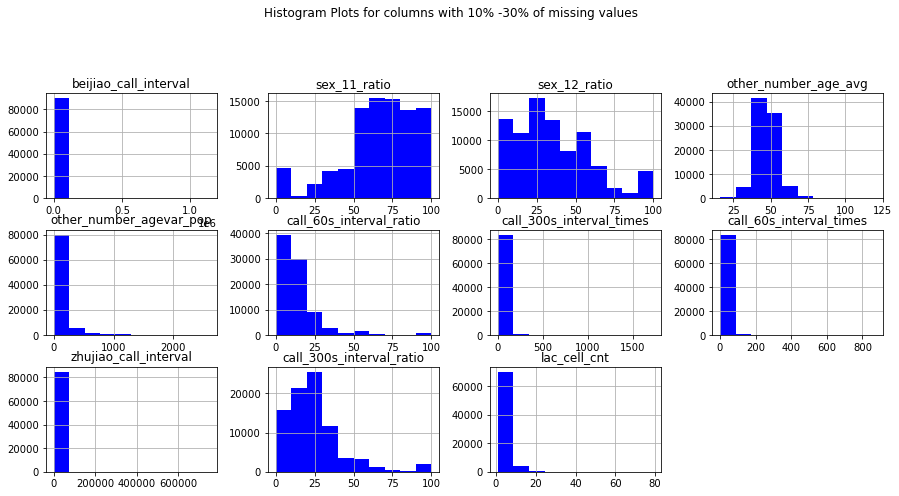

In [19]:
missing_10_30.hist(layout=(5,4), color='blue', figsize=(15, 12), grid = True)
plt.suptitle("Histogram Plots for columns with 10% -30% of missing values")

<AxesSubplot:xlabel='other_number_age_avg', ylabel='Count'>

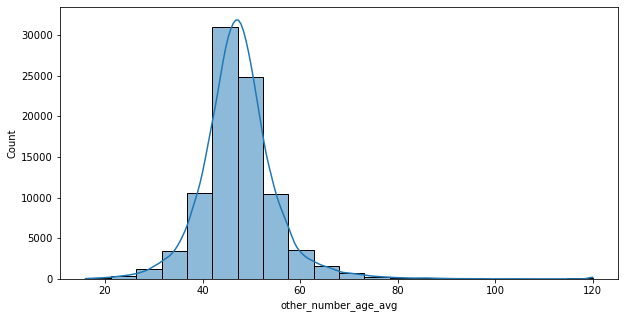

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x = data_all['other_number_age_avg'],ax=ax,kde=True,bins=20)

The column 'other_number_age_avg' can be treated as normal distribution

In [21]:
# 10% - 30% missing values
# For the column with normal distribution, fill the mean value
data_all['other_number_age_avg'] = data_all['other_number_age_avg'].fillna(data_all['other_number_age_avg'].mean())

# For the column does not follow normal distribution, fill the mode value
mode_fill = ['beijiao_call_interval', 'sex_11_ratio', 'sex_12_ratio', 'other_number_agevar_pop', 'call_60s_interval_ratio', 'call_300s_interval_times', 'call_60s_interval_times', 'zhujiao_call_interval', 'call_300s_interval_ratio', 'lac_cell_cnt']
data_all[mode_fill] = data_all[mode_fill].fillna(data_all.mode().iloc[0])

In [22]:
# Below 10% missing values
# Fill the missing values with next value
data_all.fillna(method='backfill', inplace=True)

In [23]:
data_all.isnull().sum()

stat_date                    0
user_id                      0
serial_number                0
guanting_date                0
guanting_bcyc_id             0
join_months                  0
sex_code                     0
age                          0
single_phone_flag            0
term_merge_flag              0
star_level                   0
ronghe_flag                  0
chnl_id                      0
eparchy_code                 0
id_user_cnt                  0
imei_user_cnt                0
rizuka_flag                  0
maker                        0
version                      0
waisheng_id_iccid            0
tousu_flag                   0
xieru_flag                   0
lac_cell_cnt                 0
day_lac_cnt_lm1              0
night_lac_cnt_lm1            0
day_lac_cnt_lm2              0
night_lac_cnt_lm2            0
act_voice_days_lm1           0
act_voice_days_lm2           0
act_voice_days_lm3           0
act_voice_days               0
day_call_num_lm1             0
day_call

### 3.2 Outliers  

In [24]:
data_all.describe()

,user_id,serial_number,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,ronghe_flag,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,label
count,1.013630e+05,101363.0,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.00000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.00000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000
mean,1.805782e+13,10000.0,202005.129613,140.569508,11.345284,48.163304,0.106942,0.055957,0.422235,1.178550e+08,1.810227,1.553632e+03,0.046338,0.032102,0.006866,0.000572,2.688111,35.629086,10.837603,34.928504,9.509091,21.337234,16.873188,22.066277,21.287965,137.528497,138.004597,127.645374,129.028255,29.412202,25.947249,19.372493,27.533745,13263.176494,13280.917968,12378.988576,12318.718428,166.940698,163.951846,147.050798,156.562000,39.101211,38.303523,36.342729,38.143573,80.894103,79.191046,71.335517,72.857305,22.493809,22.054764,20.863856,21.582540,0.00368,0.003601,0.003433,0.003650,7.718290,15.190247,10.733877,19.882945,94.635972,7.157562,3.341920,92.040912,7.281750,3.398824,89.571362,6.622190,3.105680,57.150691,5.609307,2.93368

In [25]:
data_all.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,act_voice_days,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_call_num,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_dura,call_num_lm1,call_num_lm2,call_num_lm3,call_num,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_cnt,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_num,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,calling_other_cnt,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label
0,2020-03-03,20310031247431,10000,2020-03-03,202003,25.0,11.0,47.0,0.0,0.0,二星,0,120001304.0,120000000.0,2.0,3.0,1,Z,Z,0,0,0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,4,1.0,33.0,1.0,10.0,0.0,12.0,0.0,0.0,7.0,2250.0,32.0,294.0,1.0,45.0,1.0,10.0,1.0,18.0,1.0,4.0,1.0,28.0,1.0,5.0,1.0,16.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.3333,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,period4,43.000000,20.25,100.0,0.0,0.0000,0.0,1,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,2018-03-19,1,1
1,2020-03-31,12310015331327,10000,2020-03-31,202003,5.0,11.0,22.0,0.0,0.0,Z,0,112054371.0,112000000.0,3.0,3.0,0,华为,EML-TL00,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,0.0,0.0,period3,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2019-11-02,1,1
2,2020-03-09,11310042606883,10000,2020-03-09,202003,2.0,11.0,23.0,1.0,0.0,Z,0,111057001.0,111000000.0,5.0,1.0,0,欧珀,PBAM00,0,0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2,1.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,2.0,50.0,32.0,1544.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,3.0,5.0,60.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,period3,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,2020-02-25,1,1
3,2020-03-03,18310019160231,10000,2020-03-03,202003,3.0,11.0,23.0,0.0,0.0,Z,0,118058857.0,118000000.0,3.0,3.0,0,苹果,iPhone 7 A1660,0,0,0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,0,113.0,1.0,1.0,113.0,0.0,0.0,0.0,0.0,3286.0,50.0,32.0,3286.0,113.0,1.0,1.0,113.0,111.0,1.0,1.0,111.0,108.0,1.0,1.0,108.0,106.0,1.0,1.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,85.8407,0.0,0.0,0.0000,0.0000,0.0,85.8407,0.0000,0.0000,0.0,

In [26]:
object_column = data_all[['stat_date', 'guanting_date', 'star_level', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code']]
non_object_column = data_all[data_all.columns.difference(['stat_date', 'guanting_date', 'star_level', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code'])]
non_object_column.head()

,act_voice_days,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,age,beijiao_call_interval,call_1day_huibo_ratio,call_1day_huibo_times,call_300s_interval_ratio,call_300s_interval_times,call_300s_times,call_300s_times_lm1,call_300s_times_lm2,call_300s_times_ratio,call_300s_times_ratio_lm1,call_300s_times_ratio_lm2,call_45s_times,call_45s_times_lm1,call_45s_times_lm2,call_45s_times_ratio,call_45s_times_ratio_lm1,call_45s_times_ratio_lm2,call_500s_times,call_500s_times_lm1,call_500s_times_lm2,call_500s_times_ratio,call_500s_times_ratio_lm1,call_500s_times_ratio_lm2,call_60s_interval_ratio,call_60s_interval_times,call_dura,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_gongzhong_flag,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_huibo_ratio,call_huibo_times,call_num,call_num_lm1,call_num_lm2,call_num_lm3,calling_num,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,day_call_num,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_lac_cnt_lm1,day_lac_cnt_lm2,dura_ratio_lm1,dura_ratio_lm2,eparchy_code,guanting_bcyc_id,id_user_cnt,imei_user_cnt,join_months,label,lac_cell_cnt,main_feeset_dura,main_prd_flow,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,main_ratio_lm1,main_ratio_lm2,night_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_lac_cnt_lm1,night_lac_cnt_lm2,open_act_flag,other_cnt,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_number_age_avg,other_number_agevar_pop,other_waisheng_ratio,rizuka_flag,ronghe_flag,serial_number,sex_11_ratio,sex_12_ratio,sex_code,single_phone_flag,term_merge_flag,total_fee_lm1,total_fee_lm2,total_fee_lm3,tousu_flag,user_id,waisheng_cnt,waisheng_id_iccid,xieru_flag,zhujiao_call_interval
0,4,20.0,1.0,10.0,47.0,20883.0,25.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0000,0.0,4.4444,8.0,1.0,33.0,80.0000,100.0000,73.3333,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,294.0,7.0,2250.0,32.0,0.0,0.0,0.0,0.0,25.0,1.0,10.0,1.0,45.0,1.0,5.0,1.0,28.0,1.0,4.0,1.0,16.0,1.0,10.0,1.0,33.0,1.0,1.0,19.0,3.33,3.33,120000000.0,202003,2.0,3.0,25.0,1,1.0,30.0,20480.0,18.0,18.0,18.0,1.0,15.0,0.0,0.0,12.0,0.0,0.0,9.0,1,4.0,1.0,18.0,1.0,43.000000,20.25,0.0000,1,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,12.0,0.0,0,20310031247431,0.0,0,0,6655.0
1,0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,28.5714,0.0,0.0000,3.0,1.0,0.0,42.8571,100.0000,0.0000,1.0,0.0,0.0,14.2857,0.0,0.0,0.0,0.0,1544.0,2.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,0.00,0.00,112000000.0,202003,3.0,3.0,5.0,1,1.0,100.0,6236.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,1.0,1.0,1.0,47.448176,0.00,83.3333,0,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0,12310015331327,4.0,1,0,0.0
2,2,1.0,1.0,1.0,23.0,0.0,0.0,0.0,100.0,5.0,2.0,0.0,0.0,28.5714,0.0,0.0000,3.0,1.0,0.0,42.8571,100.0000,0.0000,1.0,0.0,0.0,14.2857,0.0,0.0,60.0,3.0,1544.0,2.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.00,0.00,111000000.0,202003,5.0,1.0,2.0,1,1.0,100.0,6236.0,18.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,1.0,1.0,1.0,47.448176,0.00,83.3333,0,0,10000,100.0,0.0,11.0,1.0,0.0,0.4,0.4,0.4,0,11310042606883,4.0,0,0,190.0
3,0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,97.0,97.0,0.0,85.8407,85.8407,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,3286.0,3286.0,50.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,113.0,1.0,1.0,108.0,108.0,1.0,1.0,106.0,106.0,1.0,1.0,113.0,113.0,1.0,1.0,11.0,1.0,0.00,0.00,118000000.0,202003,3.0,3.0,3.0,1,1.0,30.0,0.0,8.0,8.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,111.0,111.0,1.0,1.0,47.448176,0.00,95.2830,0,0,10000,100.0,0.0,11.0,0.0,0.0,0.0,0.4,0.4,0,18310019160231,25.0,0,0,0.0
4,2,0.0,2.0,0.0,63.0,2375.0,0.0,0.0,93.0,99.0,0.0,0.0,1.0,0.0000,0.0,1.4493,97.0,97.0,43.0,85.8407,85.8407,62.3188,0.0,0.0,0.0,0.0000,0.0,0.0,58.0,62.0,3286.0,3286.0,3883.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,113.0,69.0,1.0,108.

In [27]:
non_object_column.describe()

,act_voice_days,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,age,beijiao_call_interval,call_1day_huibo_ratio,call_1day_huibo_times,call_300s_interval_ratio,call_300s_interval_times,call_300s_times,call_300s_times_lm1,call_300s_times_lm2,call_300s_times_ratio,call_300s_times_ratio_lm1,call_300s_times_ratio_lm2,call_45s_times,call_45s_times_lm1,call_45s_times_lm2,call_45s_times_ratio,call_45s_times_ratio_lm1,call_45s_times_ratio_lm2,call_500s_times,call_500s_times_lm1,call_500s_times_lm2,call_500s_times_ratio,call_500s_times_ratio_lm1,call_500s_times_ratio_lm2,call_60s_interval_ratio,call_60s_interval_times,call_dura,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_gongzhong_flag,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_huibo_ratio,call_huibo_times,call_num,call_num_lm1,call_num_lm2,call_num_lm3,calling_num,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,day_call_num,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,day_lac_cnt_lm1,day_lac_cnt_lm2,dura_ratio_lm1,dura_ratio_lm2,eparchy_code,guanting_bcyc_id,id_user_cnt,imei_user_cnt,join_months,label,lac_cell_cnt,main_feeset_dura,main_prd_flow,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,main_ratio_lm1,main_ratio_lm2,night_call_num,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,night_lac_cnt_lm1,night_lac_cnt_lm2,open_act_flag,other_cnt,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,other_number_age_avg,other_number_agevar_pop,other_waisheng_ratio,rizuka_flag,ronghe_flag,serial_number,sex_11_ratio,sex_12_ratio,sex_code,single_phone_flag,term_merge_flag,total_fee_lm1,total_fee_lm2,total_fee_lm3,tousu_flag,user_id,waisheng_cnt,waisheng_id_iccid,xieru_flag,zhujiao_call_interval
count,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.00000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.00000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.0,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,101363.000000,1.013630e+05,101363.000000,101363.000000,101363.000000,101363.000000
mean,21.287965,21.337234,16.873188,22.066277,48.163304,2.995525e+04,24.94244,5.917840,19.882945,15.190247,6.622190,7.157562,7.281750,5.539542,5.609307,5.766834,89.571362,94.635972,92.040912,57.582493,57.150691,56.785992,3.105680,3.341920,3.398824,2.880922,2.933688,3.016674,10.733877,7.718290,12318.718428,13263.176494,13280.917968,12378.988576,0.003650,0.00368,0.003601,0.003433,42.430779,9.504898,156.562000,166.940698,163.951846,147.050798,72.857305,80.894103,79.191046,71.335517,21.582540,22.493809,22.054764,20.863856,129.028255,137.528497,138.004597,127.645374,35.629086,34.928504,90.280494,91.344805,1.178550e+08,202005.129613,1.810227,1.553632e+03,140.569508,0.013447,2.688111,171.395124,2.084014e+05,50.163462,50.135809,50.004074,24

In [28]:
for i in non_object_column.columns:
    print([i])
    check_norm(non_object_column[i])

['act_voice_days']
Statistics 0.9293940617959204 p-value 0.0
The null hypothesis can be rejected
['act_voice_days_lm1']
Statistics 0.92975908650908 p-value 0.0
The null hypothesis can be rejected
['act_voice_days_lm2']
Statistics 0.9076701585965281 p-value 0.0
The null hypothesis can be rejected
['act_voice_days_lm3']
Statistics 0.9381053272478111 p-value 0.0
The null hypothesis can be rejected
['age']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['beijiao_call_interval']
Statistics 0.8895945359168209 p-value 0.0
The null hypothesis can be rejected
['call_1day_huibo_ratio']
Statistics 0.8355456053328667 p-value 0.0
The null hypothesis can be rejected
['call_1day_huibo_times']
Statistics 0.6788002278518366 p-value 0.0
The null hypothesis can be rejected
['call_300s_interval_ratio']
Statistics 0.7279596133285309 p-value 0.0
The null hypothesis can be rejected
['call_300s_interval_times']
Statistics 0.5980582498084775 p-value 0.0
The null hypothesis can be rejected
['cal

Text(0.5, 0.98, 'Histogram Plots for non-object columns')

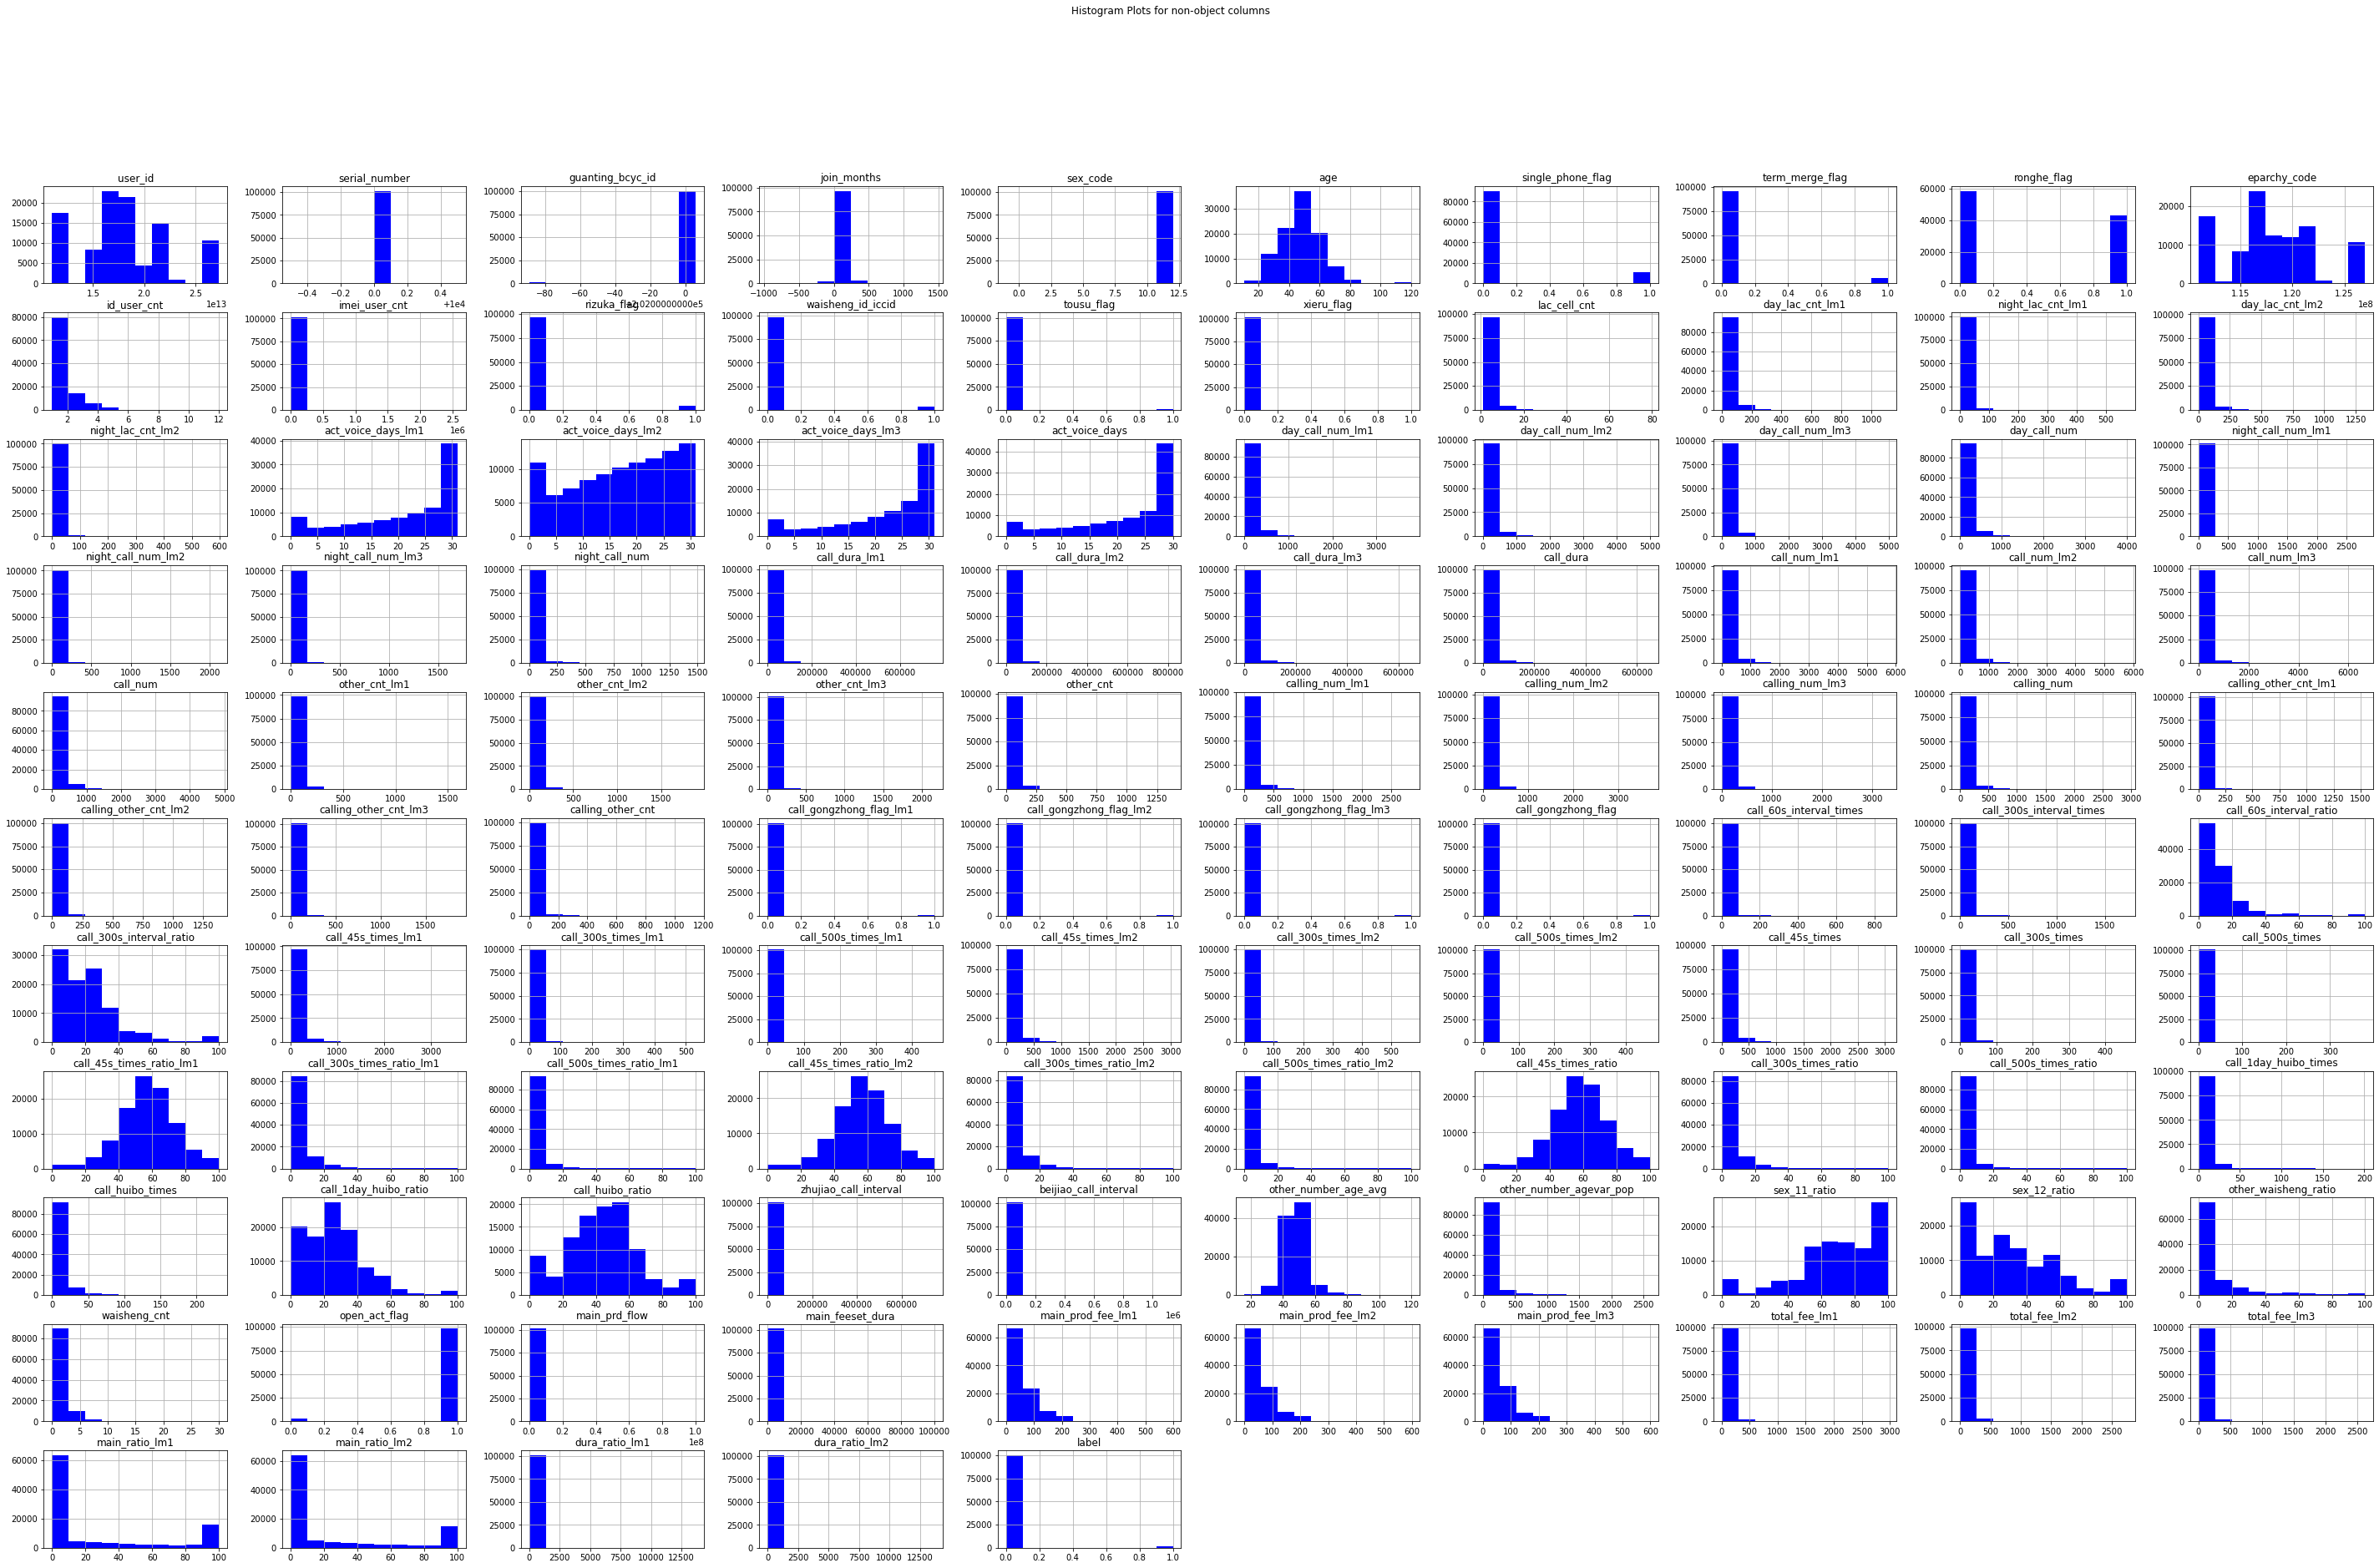

In [29]:
data_all.hist(color='blue', figsize=(50, 30), grid = True)
plt.suptitle("Histogram Plots for non-object columns")

In [30]:
def outlier_clean(data_column):
    data_column_tempo = data_column.copy()
    data_column_label = data_column.copy()
    u = data_column.mean()
    std = data_column.std()
    column_list = abs(data_column-u)>3*std
    data_column_tempo[column_list] = u +  (data_column_tempo[column_list] - u) / abs(data_column_tempo[column_list] - u) * (3*std+1)
    data_column_label[column_list] = 1
    data_column_label[~column_list] = 0

    return data_column_tempo[column_list].any(), data_column_tempo, data_column_label

In [31]:
name_list = list(data_all)
name_exclude = []
data_final = data_all.copy()

for name in name_list:
    print(name)
    data_column = data_all[name]
    if name in name_exclude:
        continue
    if (data_column.dtypes != "int64" and data_column.dtypes != "float64"):
        continue
        
    check, column_value, column_label = outlier_clean(data_column)
    if(not check):
        continue
    data_final[name] = column_value
    data_final[name+"_label"] = column_label

stat_date
user_id
serial_number
guanting_date
guanting_bcyc_id
join_months
sex_code
age
single_phone_flag
term_merge_flag
star_level
ronghe_flag
chnl_id
eparchy_code
id_user_cnt
imei_user_cnt
rizuka_flag
maker
version
waisheng_id_iccid
tousu_flag
xieru_flag
lac_cell_cnt
day_lac_cnt_lm1
night_lac_cnt_lm1
day_lac_cnt_lm2
night_lac_cnt_lm2
act_voice_days_lm1
act_voice_days_lm2
act_voice_days_lm3
act_voice_days
day_call_num_lm1
day_call_num_lm2
day_call_num_lm3
day_call_num
night_call_num_lm1
night_call_num_lm2
night_call_num_lm3
night_call_num
call_dura_lm1
call_dura_lm2
call_dura_lm3
call_dura
call_num_lm1
call_num_lm2
call_num_lm3
call_num
other_cnt_lm1
other_cnt_lm2
other_cnt_lm3
other_cnt
calling_num_lm1
calling_num_lm2
calling_num_lm3
calling_num
calling_other_cnt_lm1
calling_other_cnt_lm2
calling_other_cnt_lm3
calling_other_cnt
call_gongzhong_flag_lm1
call_gongzhong_flag_lm2
call_gongzhong_flag_lm3
call_gongzhong_flag
call_60s_interval_times
call_300s_interval_times
call_60s_interva

### 3.4 Delect unrealistic data

In [32]:
# Delect samples where open date is before 1995 as the business was satrted in 1995. 
data_all1= data_all[~(data_all['open_date'].astype(str).apply(lambda x: x.split('-')[0])=='1900')]
data_all2 = data_all1[data_all1['open_date'].astype(str).apply(lambda x: x.split('-')[0])>'1994']

# Calculate the period of use
data_all2['time_interval']=(pd.to_datetime(data_all2['stat_date'],errors='coerce')-
                            pd.to_datetime(data_all2['open_date'],errors = 'coerce')).dt.days.fillna(0)

# Delect samples where open_date is larger than stat_date
data_all3=  data_all2[data_all2['time_interval']>0]

### Encode data

In [33]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
encode_feature = ['stat_date', 'guanting_date', 'star_level', 'chnl_id', 'maker', 'version', 'period', 'open_date', 'chnl_kind_code']
for en_feat in encode_feature:
    data_all3[en_feat] = data_all3[en_feat].astype(str)
    data_all3[en_feat] = label_encoder.fit_transform(data_all3[en_feat])

## 4. Feature engineering

### 4.1 New Features Creation

In [40]:
# Create new variables, replace all the count features within 30 days with ratios, and then delete the original features
# New variables include call activity rate, daily average daytime calls, daily average nighttime calls, daily average calling duration, daily average calling number, daily average number of passtive numbers, and daily average number of calls
trans_feat = ['act_voice_days','day_call_num','night_call_num','call_dura','call_num','other_cnt','calling_num']
result_feat = ['act_ratio','day_call_num_ratio','night_call_num_ratio','call_dura_ratio','call_num_ratio','other_cnt_ratio','calling_num_ratio']
x`
for feat1,feat2 in zip(trans_feat,result_feat):
    data_all3[feat2]=data_all3[feat1]/data_all3['time_interval'].map(lambda x: 30 if x>30 else x)

In [41]:
# Calculate call density (average number of calls per day in active days)
data_all3['call_focus'] = data_all3['calling_num']/data_all3['act_voice_days']

# Calculate initiative calls dispersion
data_all4= data_all3[data_all3['calling_num']>0]
data_all4['calling_disp']=data_all4['calling_other_cnt']/data_all4['calling_num']

# Calculate the proportion of initiative calls in the past 30 days
data_all4['calling_initiative_ratio']=data_all4['calling_num']/data_all4['call_num']

In [42]:
drop_feat1 = ['act_voice_days','day_call_num','night_call_num','call_dura','call_num','other_cnt','calling_num',
              'calling_other_cnt']

data_all5= data_all4.drop(drop_feat1,axis=1)

In [43]:
data_all5.head()

,stat_date,user_id,serial_number,guanting_date,guanting_bcyc_id,join_months,sex_code,age,single_phone_flag,term_merge_flag,star_level,ronghe_flag,chnl_id,eparchy_code,id_user_cnt,imei_user_cnt,rizuka_flag,maker,version,waisheng_id_iccid,tousu_flag,xieru_flag,lac_cell_cnt,day_lac_cnt_lm1,night_lac_cnt_lm1,day_lac_cnt_lm2,night_lac_cnt_lm2,act_voice_days_lm1,act_voice_days_lm2,act_voice_days_lm3,day_call_num_lm1,day_call_num_lm2,day_call_num_lm3,night_call_num_lm1,night_call_num_lm2,night_call_num_lm3,call_dura_lm1,call_dura_lm2,call_dura_lm3,call_num_lm1,call_num_lm2,call_num_lm3,other_cnt_lm1,other_cnt_lm2,other_cnt_lm3,calling_num_lm1,calling_num_lm2,calling_num_lm3,calling_other_cnt_lm1,calling_other_cnt_lm2,calling_other_cnt_lm3,call_gongzhong_flag_lm1,call_gongzhong_flag_lm2,call_gongzhong_flag_lm3,call_gongzhong_flag,call_60s_interval_times,call_300s_interval_times,call_60s_interval_ratio,call_300s_interval_ratio,call_45s_times_lm1,call_300s_times_lm1,call_500s_times_lm1,call_45s_times_lm2,call_300s_times_lm2,call_500s_times_lm2,call_45s_times,call_300s_times,call_500s_times,call_45s_times_ratio_lm1,call_300s_times_ratio_lm1,call_500s_times_ratio_lm1,call_45s_times_ratio_lm2,call_300s_times_ratio_lm2,call_500s_times_ratio_lm2,call_45s_times_ratio,call_300s_times_ratio,call_500s_times_ratio,call_1day_huibo_times,call_huibo_times,call_1day_huibo_ratio,call_huibo_ratio,zhujiao_call_interval,beijiao_call_interval,period,other_number_age_avg,other_number_agevar_pop,sex_11_ratio,sex_12_ratio,other_waisheng_ratio,waisheng_cnt,open_act_flag,main_prd_flow,main_feeset_dura,main_prod_fee_lm1,main_prod_fee_lm2,main_prod_fee_lm3,total_fee_lm1,total_fee_lm2,total_fee_lm3,main_ratio_lm1,main_ratio_lm2,dura_ratio_lm1,dura_ratio_lm2,open_date,chnl_kind_code,label,time_interval,act_ratio,day_call_num_ratio,night_call_num_ratio,call_dura_ratio,call_num_ratio,other_cnt_ratio,calling_num_ratio,call_focus,calling_disp,calling_initiative_ratio
0,54,20310031247431,10000,54,202003,25.0,11.0,47.0,0.0,0.0,3,0,7478,120000000.0,2.0,3.0,1,12,2759,0,0,0,1.0,1.0,0.0,19.0,9.0,20.0,1.0,10.0,1.0,33.0,1.0,0.0,12.0,0.0,7.0,2250.0,32.0,1.0,45.0,1.0,1.0,18.0,1.0,1.0,28.0,1.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,2.0,0.0,8.0,0.0,0.0,100.0000,0.0,0.0,73.3333,4.4444,0.0,80.0000,0.0000,0.0000,1.0,1.0,25.0,25.0,6655.0,20883.0,3,43.000000,20.25,100.0,0.0,0.0000,0.0,1,20480.0,30.0,18.0,18.0,18.0,0.0,12.0,0.0,1.0,15.0,3.33,3.33,7107,1,1,715,0.133333,0.333333,0.0,9.800000,0.333333,0.133333,0.166667,1.25,0.800000,0.500000
1,81,12310015331327,10000,81,202003,5.0,11.0,22.0,0.0,0.0,0,0,2678,112000000.0,3.0,3.0,0,82,698,1,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,0.0,0.0,2,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,7695,1,1,150,0.000000,0.233333,0.0,51.466667,0.233333,0.200000,0.233333,inf,0.857143,1.000000
2,60,11310042606883,10000,60,202003,2.0,11.0,23.0,1.0,0.0,0,0,1156,111000000.0,5.0,1.0,0,232,1944,0,0,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,50.0,32.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,60.0,100.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,100.0000,0.0,0.0,0.0000,0.0000,0.0,42.8571,28.5714,14.2857,0.0,0.0,0.0,0.0,190.0,0.0,2,47.448176,0.00,100.0,0.0,83.3333,4.0,1,6236.0,100.0,18.0,8.0,18.0,0.4,0.4,0.4,0.0,0.0,1.00,0.00,7806,1,1,13,0.153846,0.538462,0.0,118.769231,0.538462,0.461538,0.538462,3.50,0.857143,1.000000
3,54,18310019160231,10000,54,202003,3.0,11.0,23.0,0.0,0.0,0,0,6309,118000000.0,3.0,3.0,0,322,2866,0,0,0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,1.0,113.0,1.0,1.0,0.0,0.0,0.0,3286.0,50.0,32.0,113.0,1.0,1.0,111.0,1.0,1.0,108.0,1.0,1.0,106.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,85.8407,0.0

In [44]:
(data_all5 < 0).sum()

stat_date                     0
user_id                       0
serial_number                 0
guanting_date                 0
guanting_bcyc_id              0
join_months                   0
sex_code                     45
age                           0
single_phone_flag             0
term_merge_flag               0
star_level                    0
ronghe_flag                   0
chnl_id                       0
eparchy_code                  0
id_user_cnt                   0
imei_user_cnt                 0
rizuka_flag                   0
maker                         0
version                       0
waisheng_id_iccid             0
tousu_flag                    0
xieru_flag                    0
lac_cell_cnt                  0
day_lac_cnt_lm1               0
night_lac_cnt_lm1             0
day_lac_cnt_lm2               0
night_lac_cnt_lm2             0
act_voice_days_lm1            0
act_voice_days_lm2            0
act_voice_days_lm3            0
day_call_num_lm1              0
day_call

In [45]:
data_all5.drop(data_all5[data_all5['sex_code'] < 0].index, inplace = True)
data_all5.drop(data_all5[data_all5['zhujiao_call_interval'] < 0].index, inplace = True)

In [46]:
data_all5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94895 entries, 0 to 101362
Columns: 117 entries, stat_date to calling_initiative_ratio
dtypes: float64(97), int32(9), int64(11)
memory usage: 82.2 MB


In [47]:
np.isinf(data_all5).values.sum()

2206

In [48]:
# Replace infinite updated data with nan
data_all5.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
data_all5.dropna(inplace=True)

### 4.2 Features Selection 

In [49]:
from sklearn.feature_selection import chi2

In [50]:
X = data_all5.loc[:, data_all5.columns != 'label']
y = data_all5['label']

In [51]:
chi_scores = chi2(X, y)

In [52]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [53]:
p_values > 0.05

serial_number                 True
call_gongzhong_flag           True
call_gongzhong_flag_lm3       True
open_act_flag                 True
sex_code                      True
xieru_flag                    True
main_ratio_lm1                True
night_lac_cnt_lm2             True
call_gongzhong_flag_lm1       True
maker                        False
ronghe_flag                  False
guanting_bcyc_id             False
rizuka_flag                  False
chnl_kind_code               False
term_merge_flag              False
call_gongzhong_flag_lm2      False
main_prod_fee_lm2            False
call_500s_times_lm2          False
call_500s_times_ratio_lm2    False
call_500s_times_ratio_lm1    False
call_500s_times_ratio        False
other_cnt_ratio              False
call_500s_times_lm1          False
call_45s_times_ratio_lm2     False
period                       False
waisheng_id_iccid            False
tousu_flag                   False
main_prod_fee_lm3            False
calling_disp        

In [54]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=116)

In [55]:
fs.fit(X,y)

SelectKBest(k=116)

In [56]:
print("P_Values :")
print(np.round(fs.pvalues_,4))
print("F Values :")
print(fs.scores_)

P_Values :
[0.000e+00 0.000e+00       nan 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.400e-02 0.000e+00
 0.000e+00 3.950e-01 0.000e+00 7.745e-01 0.000e+00 0.000e+00 0.000e+00
 4.131e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.983e-01 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.570e-02
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 7.210e-02 0.000e+00 5.787e-01 9.105e-01 9.500e-03
 1.670e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.400e-03 0.000e+00
 1.000e-04 9.400e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.200e-03 0.000e+00 0.000e+00 1.100e-03 0.000e+00 0.000e+00 1.000e-03
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.278e-01 2.860e-02 3.539e-01 5.260e-02 0.000e+00 0.000

In [57]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(116,columns="Score"))

                Input_Features          Score  P_Value
0                    stat_date  323821.274943   0.0000
3                guanting_date  323821.274943   0.0000
4             guanting_bcyc_id  204875.973237   0.0000
88        other_waisheng_ratio    5177.557943   0.0000
105              time_interval    4382.380856   0.0000
5                  join_months    4352.474894   0.0000
103                  open_date    3934.543045   0.0000
106                  act_ratio    3730.967533   0.0000
115   calling_initiative_ratio    3710.037204   0.0000
27          act_voice_days_lm1    3489.116656   0.0000
29          act_voice_days_lm3    2493.170327   0.0000
58    call_300s_interval_ratio    1987.696251   0.0000
89                waisheng_cnt    1987.477291   0.0000
80            call_huibo_ratio    1790.390490   0.0000
114               calling_disp    1730.343884   0.0000
82       beijiao_call_interval    1725.275499   0.0000
7                          age    1425.851406   0.0000
14        

In [ ]:
25             day_lac_cnt_lm2      98.937750   0.0000
45             calling_num_lm1      98.898884   0.0000
112          calling_num_ratio      90.368171   0.0000
96               total_fee_lm1      89.986189   0.0000
50       calling_other_cnt_lm3      84.765766   0.0000
36               call_dura_lm1      82.860760   0.0000
91               main_prd_flow      82.443033   0.0000
46             calling_num_lm2      76.789404   0.0000
41                call_num_lm3      76.142776   0.0000
97               total_fee_lm2      74.924291   0.0000
66             call_300s_times      72.404223   0.0000
37               call_dura_lm2      65.898041   0.0000
13                eparchy_code      62.526865   0.0000
111            other_cnt_ratio      56.337330   0.0000
1                      user_id      50.525504   0.0000
67             call_500s_times      48.320413   0.0000
98               total_fee_lm3      47.509301   0.0000
104             chnl_kind_code      45.215018   0.0000
69   call_300s_times_ratio_lm1      43.135208   0.0000
33          night_call_num_lm1      42.271801   0.0000
24           night_lac_cnt_lm1      41.274617   0.0000
38               call_dura_lm3      40.123669   0.0000
52     call_gongzhong_flag_lm2      39.555516   0.0000
9              term_merge_flag      39.169245   0.0000
47             calling_num_lm3      37.258772   0.0000
11                 ronghe_flag      34.210183   0.0000
71    call_45s_times_ratio_lm2      31.897443   0.0000
6                     sex_code      31.216300   0.0000
16                 rizuka_flag      28.520375   0.0000
18                     version      27.855217   0.0000
72   call_300s_times_ratio_lm2      27.678821   0.0000
35          night_call_num_lm3      21.139911   0.0000
60         call_300s_times_lm1      20.648503   0.0000
90               open_act_flag      17.798515   0.0000
63         call_300s_times_lm2      16.139534   0.0001
100             main_ratio_lm2      13.434663   0.0002
76       call_500s_times_ratio      10.884168   0.0010
73   call_500s_times_ratio_lm2      10.580265   0.0011
70   call_500s_times_ratio_lm1      10.567773   0.0012

In [59]:
# Drop unnecessary features
drop_feat = ['stat_date', 'user_id', 'guanting_date', 'guanting_bcyc_id', 'open_date', 'serial_number', 'call_gongzhong_flag', 
             'call_gongzhong_flag_lm3', 'open_act_flag', 'sex_code', 'xieru_flag', 'main_ratio_lm1', 'night_lac_cnt_lm2',
             'call_gongzhong_flag_lm1', 'maker', 'imei_user_cnt', 'main_prod_fee_lm2', 'main_feeset_dura', 'night_call_num_lm2',
             'main_prod_fee_lm1', 'call_300s_interval_times', 'chnl_id', 'call_60s_interval_times', 'call_500s_times_lm2',
             'call_500s_times_lm1']

In [60]:
data = data_all5.drop(drop_feat,axis =1)

## 5. Modeling 

### 5.1 Random Forest 

### 5.2 XGBoost 

### 5.3 Naive Bayes 

### 6. Evaluation 

### Feature Engineering

In [20]:
data.corr()['label']

user_id                    -0.023936
serial_number                    NaN
sex_code                   -0.019557
age                        -0.123616
single_phone_flag           0.091810
term_merge_flag            -0.020623
ronghe_flag                -0.018581
chnl_id                     0.007893
eparchy_code               -0.026595
id_user_cnt                 0.110560
imei_user_cnt              -0.002774
rizuka_flag                 0.017364
maker                       0.000255
version                     0.016714
waisheng_id_iccid           0.046503
tousu_flag                  0.046573
xieru_flag                 -0.002693
lac_cell_cnt               -0.014531
call_gongzhong_flag        -0.000415
call_60s_interval_ratio     0.103140
call_300s_interval_ratio    0.179927
call_45s_times_ratio       -0.052054
call_300s_times_ratio       0.036467
call_500s_times_ratio       0.010709
call_1day_huibo_times      -0.052272
call_huibo_times           -0.061058
call_1day_huibo_ratio      -0.085551
c

### Modeling 

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=0)


model = xgb.XGBClassifier(
            max_depth=5,
            n_estimators=100,
            learning_rate=0.05,
            min_child_weight=1,
            colsample_btree=1,
            objective='binary:logistic',
            subsample=0.8,
            scale_pos_weight=10)

model.fit(X_train,y_train,
                  eval_set=[(X_train,y_train), (X_test, y_test)],
                  verbose=True, early_stopping_rounds=5,
                  eval_metric=['auc','logloss'],
                  # eval_metric=auc_rank,
                  # callbacks=[xgb.callback.early_stop(30, maximize=True)]
                  )

[00:55:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_btree" } are not used.

[0]	validation_0-auc:0.90848	validation_0-logloss:0.64864	validation_1-auc:0.88877	validation_1-logloss:0.64896
[1]	validation_0-auc:0.92709	validation_0-logloss:0.60818	validation_1-auc:0.90686	validation_1-logloss:0.60869
[2]	validation_0-auc:0.94264	validation_0-logloss:0.57122	validation_1-auc:0.92446	validation_1-logloss:0.57197
[3]	validation_0-auc:0.94665	validation_0-logloss:0.53746	validation_1-auc:0.92456	validation_1-logloss:0.53849
[4]	validation_0-auc:0.94812	validation_0-logloss:0.50658	validation_1-auc:0.92548	validation_1-logloss:0.50781
[5]	validation_0-auc:0.95496	validation_0-logloss:0.47813	validation_1-auc:0.92475	validation_1-logloss:0.47952
[6]	validation_0-auc:0.95696	validation_0-logloss:0.45173	validation_1-auc:0.92332	validation_1-logloss:0.45333
[7]	validat

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_btree=1, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [30]:
result = model.predict_proba(X_test)[:,1]

# Feature importance
importances = model.feature_importances_

a =X_train.columns.tolist()
imp = pd.DataFrame(np.c_[a,importances]).sort_values(1,ascending=False)
imp.columns = ['col_name','importance']
print(imp)

                    col_name    importance
47          calling_zj_ratio    0.24131551
38                 act_ratio    0.07707493
28      other_number_age_avg   0.064811446
45                call_focus   0.044621676
32      other_waisheng_ratio   0.043166418
22     call_1day_huibo_times   0.026634725
5                    chnl_id   0.026104467
1                        age   0.026030947
46             calling_lisan   0.022114279
6               eparchy_code   0.021470992
48                 sms_ratio   0.020047564
7                id_user_cnt   0.019554563
0                   sex_code   0.018702121
35             main_prd_flow   0.018546829
43           other_cnt_ratio   0.017729813
2          single_phone_flag   0.017173823
36          main_feeset_dura   0.017077109
12         waisheng_id_iccid   0.017017784
27     beijiao_call_interval   0.016055958
33              waisheng_cnt   0.015788138
13                tousu_flag   0.015328705
26     zhujiao_call_interval   0.012655634
37         

### Evaluation 

source: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/